# 12Z Model

## Scott Burgholzer MSDS Capstone Project Fall 2019

###### Import all Python Libraries and set up seed value

In [1]:
import os
os.environ['PYTHONHASHSEED']=str(0)

import random
random.seed(0)

from numpy.random import seed
seed(0)

import tensorflow as tf

print(tf.__version__)
from tensorflow import keras
tf.random.set_seed(0)

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.regularizers import l2, l1, l1_l2


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
#tf.keras.wrappers.skikit_learn.KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

2.0.0-beta1


###### Get the data and split into Train/Test sets

In [2]:
data = pd.read_csv(r'D:\MSDS-Capstone-Project\implementation\Data\12Z-randomized.csv')
data.rename( columns={'Unnamed: 0':'Date'}, inplace=True )
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data.sample(frac=1)
data.loc[data.COUNT < 5, 'countBinary2'] = 0
data.loc[data.COUNT >= 5, 'countBinary2'] = 1
data

,2mTemp,2mDpt,sfcCAPE,sfcCIN,sfcPotentialTmp,sfcPressure,PWAT,2mRH,srh,lifted index 180-0 mb above gnd Best (4-layer),...,700mb wind speed,850mb Geopotenial height,850mb Temperature,850mb wind speed,925mb Geopotenial height,925mb Temperature,925mb wind speed,COUNT,countBinary,countBinary2
Date,,,,,,,,,,,,,,,,,,,,,
2011-10-06,287.265,281.863,265.11600,-35.512700,291.407,93529.2,21.53180,72.0876,99.6958,2.483520,...,11.22160,1492.45,287.497,11.64440,774.391,291.373,10.89710,1,0,0.0
1990-12-26,265.476,261.804,3.11226,-0.690191,269.292,94440.7,10.51890,76.7582,164.3880,10.971700,...,13.77240,1503.75,268.037,7.61504,839.992,269.018,5.98734,0,0,0.0
1994-10-31,281.774,276.761,81.25760,-29.153300,285.317,93723.8,14.71680,73.1869,78.9646,5.097470,...,10.76590,1496.27,280.851,8.70779,794.446,284.385,7.10287,0,0,0.0
2006-09-20,284.649,279.335,45.19940,-9.192230,288.072,93776.8,16.73770,71.6783,93.3403,7.223990,...,8.69515,1502.98,285.057,7.34951,794.001,288.108,6.33534,0,0,0.0
1990-11-24,279.364,272.338,3.43672,-3.860600,283.224,93165.8,12.69360,64.5273,134.9570,10.394300,...,14.72480,1446.39,283.309,10.42990,741.915,285.599,7.44615,0,0,0.0
1994-05-29,290.335,285.127,631.52200,-61.560300,295.063,93438.5,25.17980,74.5712,101.8570,0.061371,...,8.08186,1491.20,289.620,7.21787,766.631,293.090,7.36408,20,1,1.0
1995-10-09,284.371,278.905,12.14880,-26.371600,287.267,93734.1,15.57950,72.3819,69.8052,5.137250,...,8.57337,1504.38,286.019,5.20739,791.975,288.734,4.98147,0,0,0.0
2004-12-28,274.127,271.089,6.25194,-1.033570,277.324,94242.7,10.14280,82.4991,128.8500,8.701190,...,11.79590,1521.43,279.489,10.22030,830.643,280.125,9.90351,0,0,0.0
1999-09-30,283.006,276.905,8.86099,-0.768700,285.706,94014.8,13.48450,67.9318,81.9676,8.220050,...,9.55931,1523.06,283.229,7.68802,816.198,287.066,7.93889,0,0,0.0


In [3]:
# creating input featues and target variables
X = data.iloc[:,0:26]
y = data.iloc[:,28]

In [4]:
X.shape

(12784, 26)

In [5]:
X.tail()

,2mTemp,2mDpt,sfcCAPE,sfcCIN,sfcPotentialTmp,sfcPressure,PWAT,2mRH,srh,lifted index 180-0 mb above gnd Best (4-layer),...,500mb wind speed,700mb Geopotenial height,700mb Temperature,700mb wind speed,850mb Geopotenial height,850mb Temperature,850mb wind speed,925mb Geopotenial height,925mb Temperature,925mb wind speed
Date,,,,,,,,,,,,,,,,,,,,,
1993-09-23,288.157,284.577,575.01400,-33.61750,291.864,94124.0,27.0542,80.3459,77.3142,1.96625,...,14.9799,3164.09,279.662,8.70047,1547.52,286.724,7.62317,831.128,290.007,7.29449
2011-06-17,292.877,285.656,916.11800,-136.15100,298.124,93159.9,26.4787,71.3153,129.0600,-1.46352,...,11.7150,3121.55,283.033,8.79699,1476.49,292.670,9.93746,744.080,295.777,9.47035
1992-05-04,285.521,279.749,126.60700,-22.15790,288.823,93997.6,17.7513,69.5419,56.2166,2.90364,...,13.4431,3117.16,273.804,8.32777,1526.57,284.095,5.44321,815.540,288.366,4.17397
1988-12-23,276.390,270.640,50.25370,-7.45162,279.761,93281.7,10.8612,69.1980,99.1975,6.62311,...,24.8954,3002.34,269.263,16.77690,1445.41,277.020,11.11910,755.784,280.330,8.82750
1983-10-28,282.731,278.063,8.23615,-5.75138,285.719,94107.9,12.7608,74.5978,52.2688,7.13588,...,14.7416,3142.70,277.899,12.17690,1536.24,285.249,10.13430,826.450,287.316,9.67645


In [6]:
y.value_counts()

0.0    11181
1.0     1603
Name: countBinary2, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [8]:
scaler = StandardScaler().fit(X_train)
X_Train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

###### Function to plot the losses

In [121]:
def plot_history(hist):
    fig = plt.figure(figsize=(6,4))
    # # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'], 'g--')
    plt.title('Classification Model Loss')
    plt.ylabel('Binary Crossentropy')
    plt.xlabel('Epoch')
    plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
    print ("Loss after final iteration: ", history.history['val_loss'][-1])
    plt.show()

#### Machine Learning Models

###### Attempt 1

In [176]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=26, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=0), 
                             kernel_regularizer=l1_l2(0.001), input_shape=(26,)))
model.add(keras.layers.Dense(units=26, activation='relu', kernel_regularizer=l1_l2(0.001)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=1, activation='sigmoid', kernel_regularizer=l1_l2(0.001)))
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(learning_rate = 0.001, momentum=0.5), 
              metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 10, batch_size=6500)

Train on 7670 samples, validate on 2557 samples
Epoch 1/10
7670/7670 [==============================] - 1s 68us/sample - loss: 13.1809 - accuracy: 0.2120 - val_loss: 1.8908 - val_accuracy: 0.5819
Epoch 2/10
7670/7670 [==============================] - 0s 2us/sample - loss: 6.1933 - accuracy: 0.6684 - val_loss: 1.8020 - val_accuracy: 0.6038
Epoch 3/10
7670/7670 [==============================] - 0s 2us/sample - loss: 4.9054 - accuracy: 0.7525 - val_loss: 1.7330 - val_accuracy: 0.6304
Epoch 4/10
7670/7670 [==============================] - 0s 2us/sample - loss: 3.6493 - accuracy: 0.8346 - val_loss: 1.6948 - val_accuracy: 0.6519
Epoch 5/10
7670/7670 [==============================] - 0s 2us/sample - loss: 3.4133 - accuracy: 0.8499 - val_loss: 1.6855 - val_accuracy: 0.6570
Epoch 6/10
7670/7670 [==============================] - 0s 2us/sample - loss: 3.5214 - accuracy: 0.8429 - val_loss: 1.6831 - val_accuracy: 0.6574
Epoch 7/10
7670/7670 [==============================] - 0s 2us/sample - lo

In [177]:
eval_model=model.evaluate(X_train, y_train)
print(eval_model)

7670/7670 [==============================] - 0s 33us/sample - loss: 3.0791 - accuracy: 0.8717
[3.079100558717372, 0.871708]


In [178]:
model.evaluate(X_test, y_test, verbose=0)

[1.6252061816272578, 0.68908876]

Loss after final iteration:  1.6347150802612305


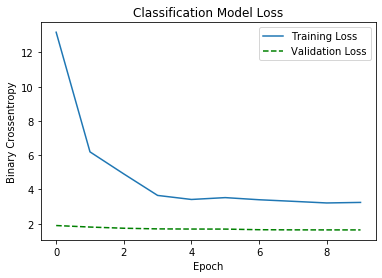

In [179]:
plot_history(history)

In [180]:
predictions = pd.DataFrame(model.predict(X_test))


predictions[predictions > 0.5] = 1 #'5 or more Tornadoes'
predictions[predictions <= 0.5] = 0 #'Less than 5 Tornadoes'

print('accuracy', accuracy_score(predictions, y_test))
print('confusion matrix\n', confusion_matrix(predictions,y_test))

print(classification_report(predictions, y_test))

accuracy 0.6890887759092686
confusion matrix
 [[1596  141]
 [ 654  166]]
              precision    recall  f1-score   support

         0.0       0.71      0.92      0.80      1737
         1.0       0.54      0.20      0.29       820

   micro avg       0.69      0.69      0.69      2557
   macro avg       0.63      0.56      0.55      2557
weighted avg       0.66      0.69      0.64      2557



###### Attempt 2, using Adadelta optimizer

In [122]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=26, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=0), 
                             kernel_regularizer=l1_l2(0.001), input_shape=(26,)))
model.add(keras.layers.Dense(units=26, activation='relu', kernel_regularizer=l1_l2(0.001)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=1, activation='sigmoid', kernel_regularizer=l1_l2(0.001)))
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 10, batch_size=6500)

Train on 7670 samples, validate on 2557 samples
Epoch 1/10
7670/7670 [==============================] - 1s 68us/sample - loss: 3.0662 - accuracy: 0.8712 - val_loss: 1.6138 - val_accuracy: 0.7720
Epoch 2/10
7670/7670 [==============================] - 0s 3us/sample - loss: 3.0641 - accuracy: 0.8713 - val_loss: 1.6138 - val_accuracy: 0.7720
Epoch 3/10
7670/7670 [==============================] - 0s 2us/sample - loss: 3.0601 - accuracy: 0.8716 - val_loss: 1.6138 - val_accuracy: 0.7720
Epoch 4/10
7670/7670 [==============================] - 0s 2us/sample - loss: 3.0621 - accuracy: 0.8714 - val_loss: 1.6137 - val_accuracy: 0.7720
Epoch 5/10
7670/7670 [==============================] - 0s 2us/sample - loss: 3.0681 - accuracy: 0.8711 - val_loss: 1.6137 - val_accuracy: 0.7720
Epoch 6/10
7670/7670 [==============================] - 0s 2us/sample - loss: 3.0660 - accuracy: 0.8712 - val_loss: 1.6137 - val_accuracy: 0.7720
Epoch 7/10
7670/7670 [==============================] - 0s 2us/sample - los

In [123]:
eval_model=model.evaluate(X_train, y_train)
print(eval_model)

7670/7670 [==============================] - 0s 35us/sample - loss: 3.0580 - accuracy: 0.8717
[3.057959506471278, 0.871708]


In [124]:
model.evaluate(X_test, y_test, verbose=0)

[1.6100933656218839, 0.77825576]

Loss after final iteration:  1.6136311292648315


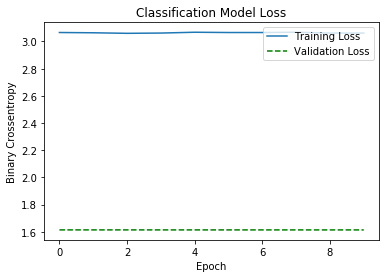

In [125]:
plot_history(history)

In [126]:
predictions = pd.DataFrame(model.predict(X_test))
predictions[predictions > 0.5] = 1 #'5 or more Tornadoes'
predictions[predictions <= 0.5] = 0 #'Less than 5 Tornadoes'

print('accuracy', accuracy_score(predictions, y_test))
print('confusion matrix\n', confusion_matrix(predictions,y_test))

print(classification_report(predictions, y_test))

accuracy 0.7782557684786859
confusion matrix
 [[1960  277]
 [ 290   30]]
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87      2237
         1.0       0.10      0.09      0.10       320

   micro avg       0.78      0.78      0.78      2557
   macro avg       0.48      0.48      0.48      2557
weighted avg       0.77      0.78      0.78      2557



##### Attempt 3, Adagrad

In [127]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=26, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=0), 
                             kernel_regularizer=l1_l2(0.001), input_shape=(26,)))
model.add(keras.layers.Dense(units=26, activation='relu', kernel_regularizer=l1_l2(0.001)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=1, activation='sigmoid', kernel_regularizer=l1_l2(0.001)))
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adagrad(), metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 10, batch_size=6500)

Train on 7670 samples, validate on 2557 samples
Epoch 1/10
7670/7670 [==============================] - 1s 70us/sample - loss: 3.8423 - accuracy: 0.8203 - val_loss: 1.8602 - val_accuracy: 0.4415
Epoch 2/10
7670/7670 [==============================] - 0s 2us/sample - loss: 3.8912 - accuracy: 0.8172 - val_loss: 1.8599 - val_accuracy: 0.4415
Epoch 3/10
7670/7670 [==============================] - 0s 2us/sample - loss: 3.9631 - accuracy: 0.8125 - val_loss: 1.8596 - val_accuracy: 0.4419
Epoch 4/10
7670/7670 [==============================] - 0s 2us/sample - loss: 3.8988 - accuracy: 0.8167 - val_loss: 1.8593 - val_accuracy: 0.4419
Epoch 5/10
7670/7670 [==============================] - 0s 2us/sample - loss: 3.9104 - accuracy: 0.8158 - val_loss: 1.8530 - val_accuracy: 0.4505
Epoch 6/10
7670/7670 [==============================] - 0s 2us/sample - loss: 3.8674 - accuracy: 0.8186 - val_loss: 1.8518 - val_accuracy: 0.4513
Epoch 7/10
7670/7670 [==============================] - 0s 2us/sample - los

In [128]:
eval_model=model.evaluate(X_train, y_train)
print(eval_model)

7670/7670 [==============================] - 0s 32us/sample - loss: 3.0544 - accuracy: 0.8717
[3.054373912861015, 0.871708]


In [129]:
model.evaluate(X_test, y_test, verbose=0)

[1.855139642242906, 0.43840438]

Loss after final iteration:  1.8505377769470215


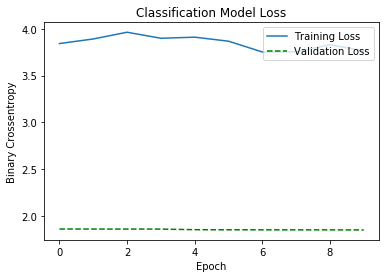

In [130]:
plot_history(history)

In [131]:
predictions = pd.DataFrame(model.predict(X_test))
predictions[predictions > 0.5] = 1 #'5 or more Tornadoes'
predictions[predictions <= 0.5] = 0 #'Less than 5 Tornadoes'

print('accuracy', accuracy_score(predictions, y_test))
print('confusion matrix\n', confusion_matrix(predictions,y_test))

print(classification_report(predictions, y_test))

accuracy 0.43840438013296834
confusion matrix
 [[ 923  109]
 [1327  198]]
              precision    recall  f1-score   support

         0.0       0.41      0.89      0.56      1032
         1.0       0.64      0.13      0.22      1525

   micro avg       0.44      0.44      0.44      2557
   macro avg       0.53      0.51      0.39      2557
weighted avg       0.55      0.44      0.36      2557



##### Attempt 4, Adam

In [132]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=26, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=0), 
                             kernel_regularizer=l1_l2(0.001), input_shape=(26,)))
model.add(keras.layers.Dense(units=26, activation='relu', kernel_regularizer=l1_l2(0.001)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=1, activation='sigmoid', kernel_regularizer=l1_l2(0.001)))
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              metrics=['accuracy'])



history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 10, batch_size=6500)

Train on 7670 samples, validate on 2557 samples
Epoch 1/10
7670/7670 [==============================] - 1s 76us/sample - loss: 3.8303 - accuracy: 0.8218 - val_loss: 1.7565 - val_accuracy: 0.5632
Epoch 2/10
7670/7670 [==============================] - 0s 3us/sample - loss: 3.5527 - accuracy: 0.8391 - val_loss: 1.7285 - val_accuracy: 0.5921
Epoch 3/10
7670/7670 [==============================] - 0s 2us/sample - loss: 3.3365 - accuracy: 0.8528 - val_loss: 1.7049 - val_accuracy: 0.6179
Epoch 4/10
7670/7670 [==============================] - 0s 2us/sample - loss: 3.2429 - accuracy: 0.8581 - val_loss: 1.6841 - val_accuracy: 0.6359
Epoch 5/10
7670/7670 [==============================] - 0s 2us/sample - loss: 3.2119 - accuracy: 0.8596 - val_loss: 1.6650 - val_accuracy: 0.6551
Epoch 6/10
7670/7670 [==============================] - 0s 2us/sample - loss: 3.1590 - accuracy: 0.8625 - val_loss: 1.6481 - val_accuracy: 0.6719
Epoch 7/10
7670/7670 [==============================] - 0s 2us/sample - los

In [133]:
eval_model=model.evaluate(X_train, y_train)
print(eval_model)

7670/7670 [==============================] - 0s 45us/sample - loss: 2.9685 - accuracy: 0.8717
[2.9685409811360586, 0.871708]


In [134]:
model.evaluate(X_test, y_test, verbose=0)

[1.5913084480134967, 0.71842]

Loss after final iteration:  1.5891822576522827


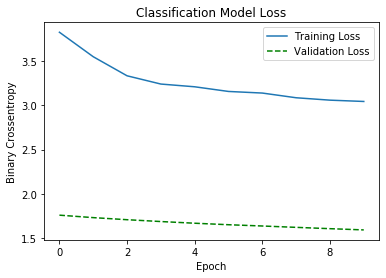

In [135]:
plot_history(history)

In [136]:
predictions = pd.DataFrame(model.predict(X_test))

#predictions

predictions[predictions > 0.5] = 1 #'5 or more Tornadoes'
predictions[predictions <= 0.5] = 0 #'Less than 5 Tornadoes'

print('accuracy', accuracy_score(predictions, y_test))
print('confusion matrix\n', confusion_matrix(predictions,y_test))

print(classification_report(predictions, y_test))

accuracy 0.718420023464998
confusion matrix
 [[1721  191]
 [ 529  116]]
              precision    recall  f1-score   support

         0.0       0.76      0.90      0.83      1912
         1.0       0.38      0.18      0.24       645

   micro avg       0.72      0.72      0.72      2557
   macro avg       0.57      0.54      0.54      2557
weighted avg       0.67      0.72      0.68      2557



###### Attempt 5, NAdam

In [137]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=26, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=0), 
                             kernel_regularizer=l1_l2(0.001), input_shape=(26,)))
model.add(keras.layers.Dense(units=26, activation='relu', kernel_regularizer=l1_l2(0.001)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=1, activation='sigmoid', kernel_regularizer=l1_l2(0.001)))
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Nadam(learning_rate=0.003), 
              metrics=['accuracy'])



history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 10, batch_size=6500)

Train on 7670 samples, validate on 2557 samples
Epoch 1/10
7670/7670 [==============================] - 1s 105us/sample - loss: 12.4295 - accuracy: 0.2588 - val_loss: 1.7233 - val_accuracy: 0.6476
Epoch 2/10
7670/7670 [==============================] - 0s 2us/sample - loss: 12.3485 - accuracy: 0.2617 - val_loss: 1.6955 - val_accuracy: 0.6425
Epoch 3/10
7670/7670 [==============================] - 0s 2us/sample - loss: 12.3724 - accuracy: 0.2581 - val_loss: 1.6507 - val_accuracy: 0.6617
Epoch 4/10
7670/7670 [==============================] - 0s 2us/sample - loss: 12.0968 - accuracy: 0.2744 - val_loss: 1.6221 - val_accuracy: 0.6629
Epoch 5/10
7670/7670 [==============================] - 0s 2us/sample - loss: 12.0489 - accuracy: 0.2759 - val_loss: 1.5937 - val_accuracy: 0.6676
Epoch 6/10
7670/7670 [==============================] - 0s 2us/sample - loss: 12.0866 - accuracy: 0.2717 - val_loss: 1.5656 - val_accuracy: 0.6695
Epoch 7/10
7670/7670 [==============================] - 0s 2us/sampl

In [138]:
eval_model=model.evaluate(X_train, y_train)
print(eval_model)

7670/7670 [==============================] - 0s 32us/sample - loss: 2.7725 - accuracy: 0.8717
[2.772479595447923, 0.871708]


In [139]:
model.evaluate(X_test, y_test, verbose=0)

[1.403443503389146, 0.7328901]

Loss after final iteration:  1.4029563665390015


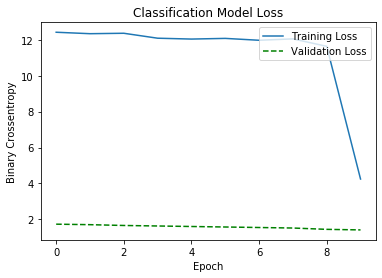

In [140]:
plot_history(history)

In [141]:
predictions = pd.DataFrame(model.predict(X_test))

#predictions

predictions[predictions > 0.5] = 1 #'5 or more Tornadoes'
predictions[predictions <= 0.5] = 0 #'Less than 5 Tornadoes'

print('accuracy', accuracy_score(predictions, y_test))
print('confusion matrix\n', confusion_matrix(predictions,y_test))

print(classification_report(predictions, y_test))

accuracy 0.7328901055924912
confusion matrix
 [[1866  299]
 [ 384    8]]
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.85      2165
         1.0       0.03      0.02      0.02       392

   micro avg       0.73      0.73      0.73      2557
   macro avg       0.43      0.44      0.43      2557
weighted avg       0.71      0.73      0.72      2557

